## downloading the data into csv


In [ ]:
 import gdown

url =  'https://drive.google.com/uc?id=1FiHN6YlfZv_NRm3JM2krc-UvlQL4l_au'
gdown.download(url,output = 'jamboree.csv')

Downloading...
From: https://drive.google.com/uc?id=1FiHN6YlfZv_NRm3JM2krc-UvlQL4l_au
To: /content/jamboree.csv
100%|██████████| 16.2k/16.2k [00:00<00:00, 26.0MB/s]


'jamboree.csv'

## Basic Exploration and cleaning of the Dataset

In [ ]:
import pandas as pd
jamboree_df = pd.read_csv('jamboree.csv')
jamboree_df.head(10)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
5,6,330,115,5,4.5,3.0,9.34,1,0.90
6,7,321,109,3,3.0,4.0,8.20,1,0.75
7,8,308,101,2,3.0,4.0,7.90,0,0.68
8,9,302,102,1,2.0,1.5,8.00,0,0.50
9,10,323,108,3,3.5,3.0,8.60,0,0.45


In [ ]:
jamboree_df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [ ]:
jamboree_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [ ]:
jamboree_df.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [ ]:
jamboree_df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


## performing Exploratory Data Analysis

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: xlabel='Chance of Admit ', ylabel='Count'>

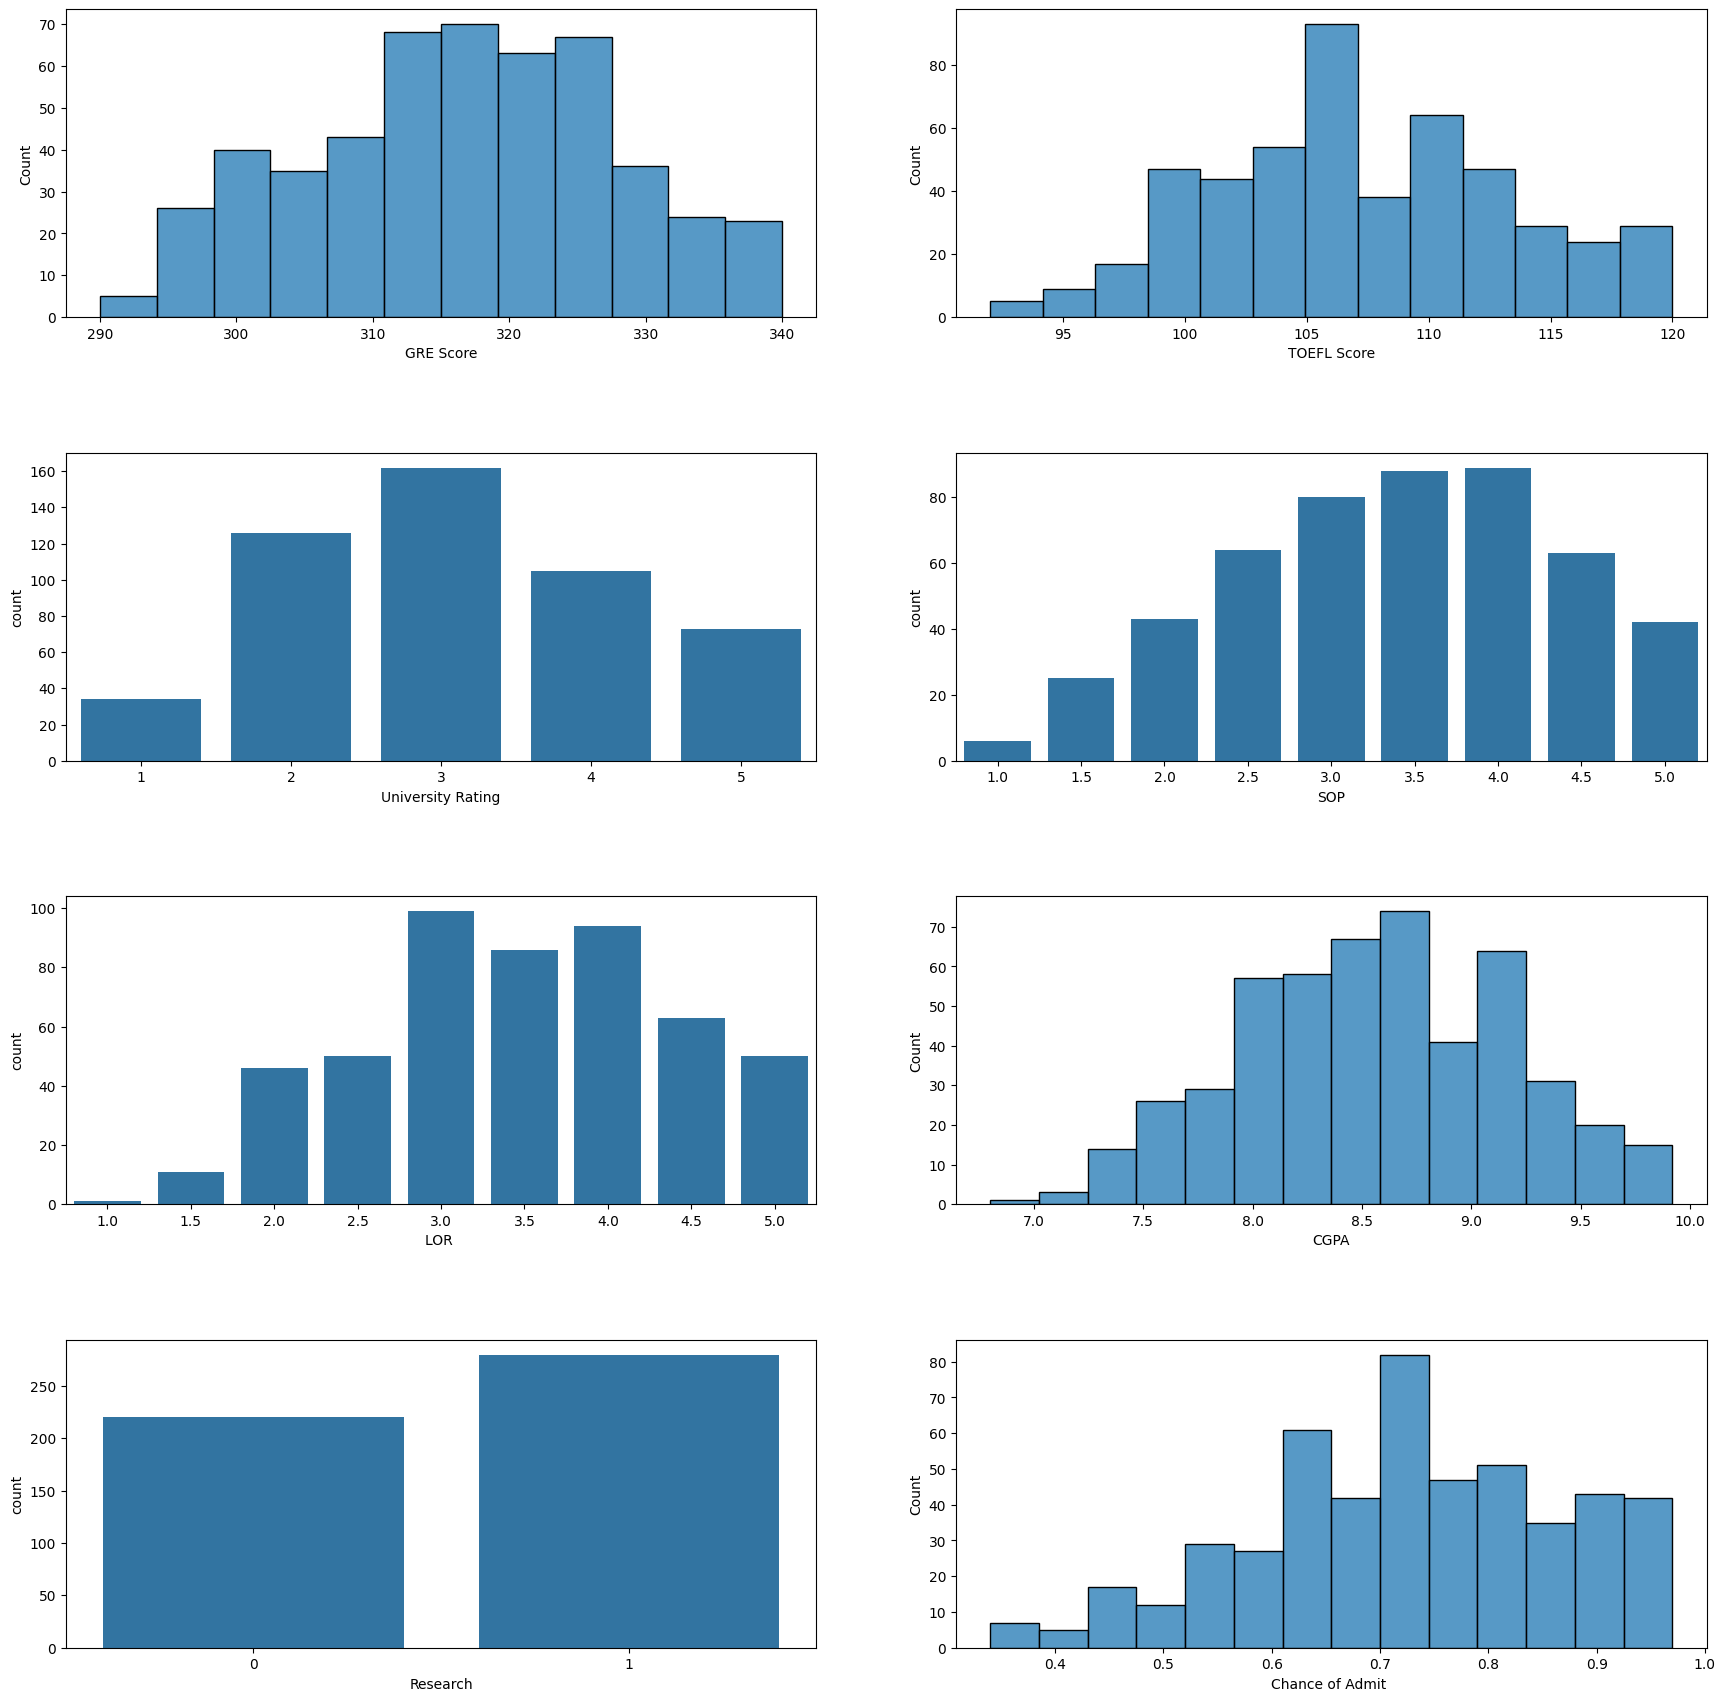

In [ ]:
fig, ax = plt.subplots(4, 2)
fig.tight_layout(pad=0.5)
fig.set_figheight(18)
fig.set_figwidth(18)

plt.subplot(4,2,1)
sns.histplot(x = jamboree_df['GRE Score'])

plt.subplot(4,2,2)
sns.histplot(x = jamboree_df['TOEFL Score'])

plt.subplot(4,2,3)
sns.countplot(x = jamboree_df['University Rating'])

plt.subplot(4,2,4)
sns.countplot(x = jamboree_df['SOP'])

plt.subplot(4,2,5)
sns.countplot(x = jamboree_df['LOR '])

plt.subplot(4,2,6)
sns.histplot(x = jamboree_df['CGPA'])

plt.subplot(4,2,7)
sns.countplot(x = jamboree_df['Research'])

plt.subplot(4,2,8)
sns.histplot(x = jamboree_df['Chance of Admit '])

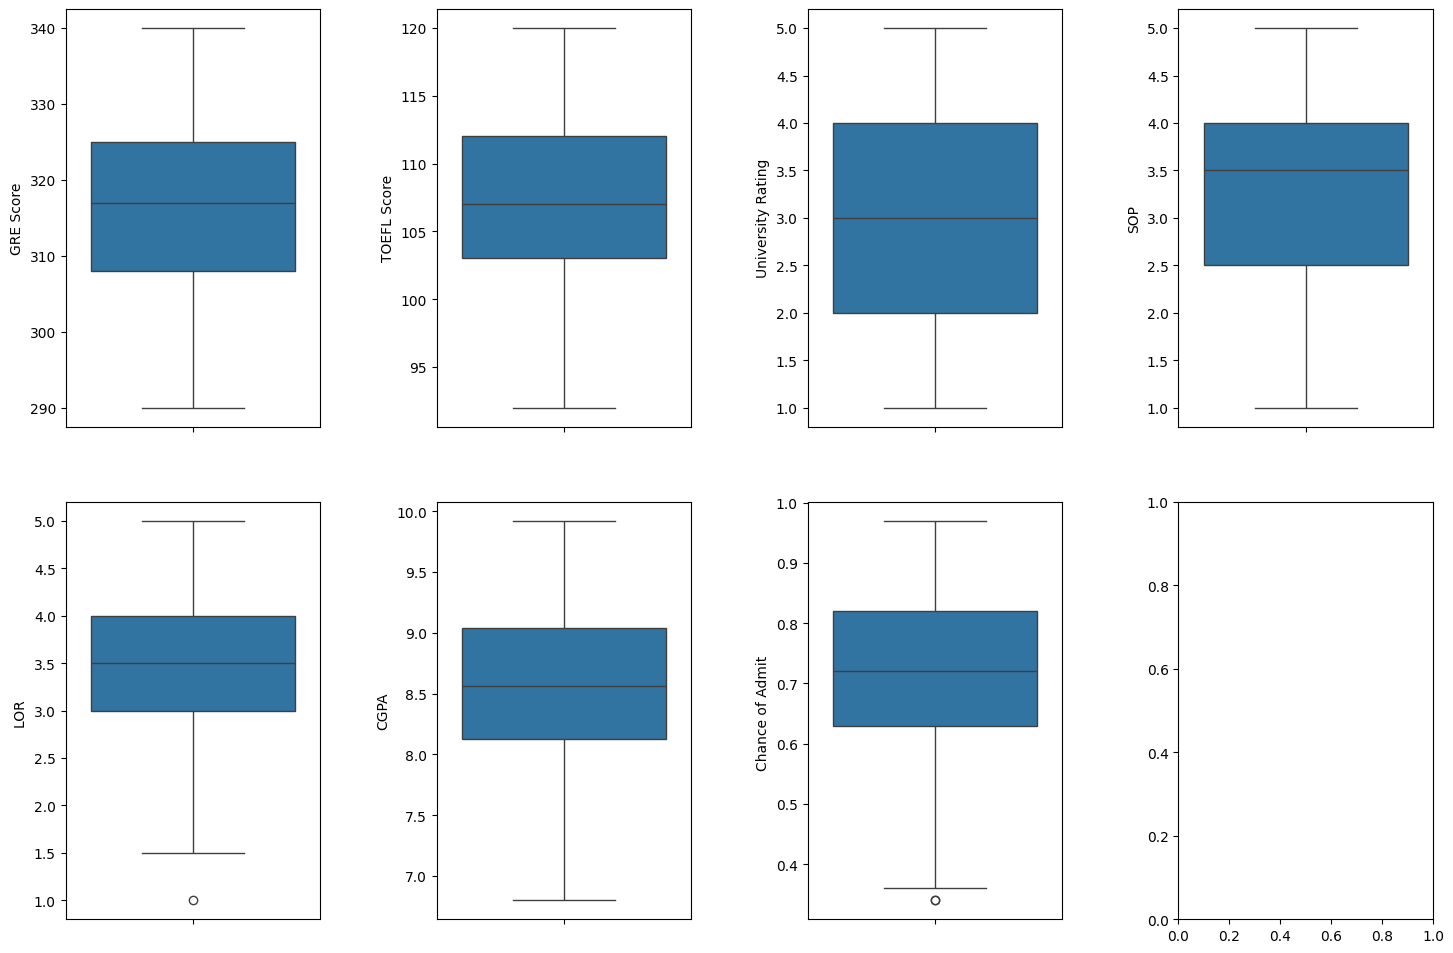

In [ ]:
fig, ax = plt.subplots(2, 4)
fig.tight_layout(pad=0.5)
fig.set_figheight(10)
fig.set_figwidth(15)

cols = ['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA', 'Chance of Admit ']

for i,col in enumerate(cols):
  plt.subplot(2, 4, i+1)
  sns.boxplot(data=jamboree_df[col])

Outlier treatment

In [ ]:
def treat_outlier(col):
  Q1 = jamboree_df[col].quantile(0.25)
  Q3 = jamboree_df[col].quantile(0.75)
  IQR = Q3 - Q1
  lower = max(Q1 - 1.5*IQR,0)
  upper = min(Q3 + 1.5*IQR, jamboree_df[col].max())

  indx = jamboree_df[jamboree_df[col]<lower].index
  jamboree_df.loc[indx,[col]] = lower

In [ ]:
treat_outlier('LOR ')
treat_outlier('Chance of Admit ')

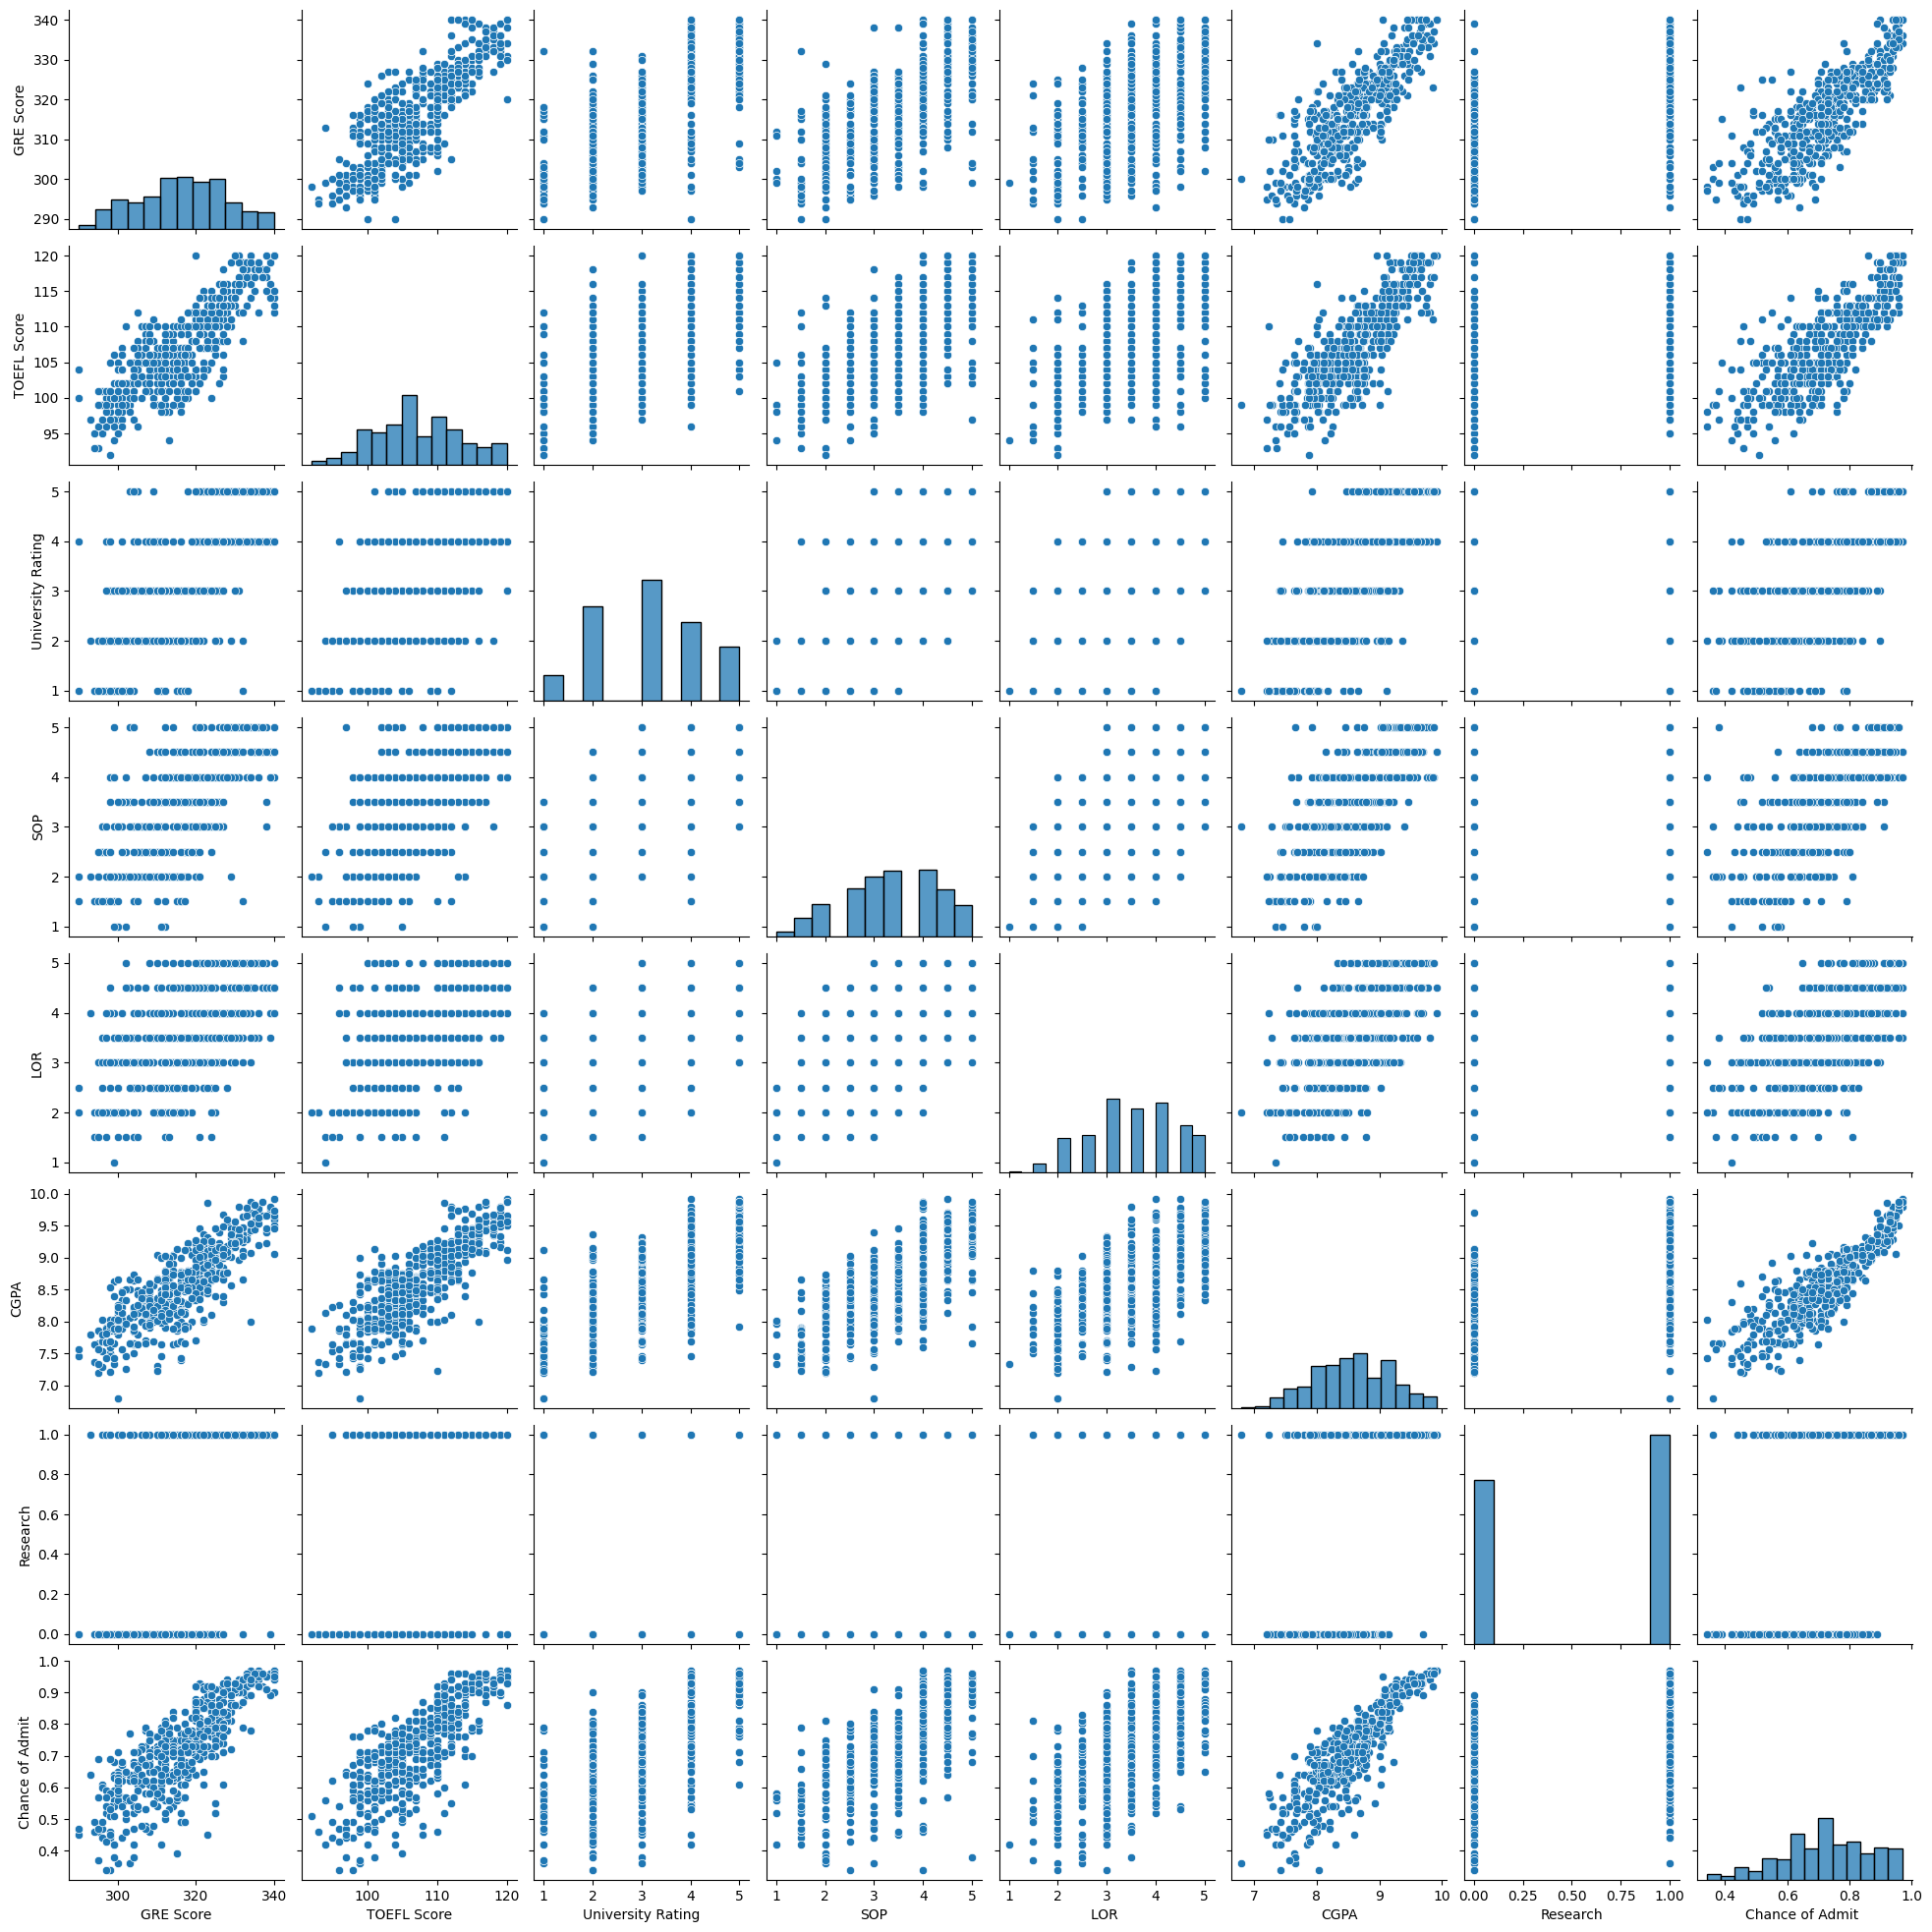

In [ ]:
sns.pairplot(jamboree_df.loc[:,'GRE Score':])

## Data Preprosseing for Model Training

Divinding the data into training and testing data

In [ ]:
from sklearn.model_selection import train_test_split

df = jamboree_df.drop(columns='Serial No.')

y = df['Chance of Admit ']
X = df.drop('Chance of Admit ', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

Scaleing the Data

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train = pd.DataFrame(scaler.fit_transform(X_train), columns= X_train.columns)
X_test = pd.DataFrame(scaler.fit_transform(X_test), columns= X_test.columns)

## Linear Regression Using Stats Model

In [ ]:
import statsmodels.api as sm
import numpy as np

X_train_sm = sm.add_constant(X_train)
X_test_sm = sm.add_constant(X_test)

 OLS Regression Results  

In [ ]:
sm_model = sm.OLS(list(y_train),X_train_sm)
results = sm_model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     272.6
Date:                Tue, 05 Mar 2024   Prob (F-statistic):          2.51e-146
Time:                        20:18:04   Log-Likelihood:                 573.90
No. Observations:                 400   AIC:                            -1132.
Df Residuals:                     392   BIC:                            -1100.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.3636      0.01

Multicollinearity check by VIF score

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train,i) for i in range(X_train.shape[1])]

r2 = results.rsquared_adj
vif = vif.sort_values(by= 'VIF', ascending=False)
vif

,features,VIF
5,CGPA,36.463862
1,TOEFL Score,26.315185
0,GRE Score,23.472776
3,SOP,17.948470
4,LOR,11.313363
2,University Rating,10.958911
6,Research,3.308506


Removing the variable with highest VIF

In [ ]:
X_train_new = X_train
while vif['VIF'][0]>5 and r2>0.82:
  X_train_new = X_train_new.drop(columns=vif['features'][0])

  vif = pd.DataFrame()
  vif['features'] = X_train_new.columns
  vif['VIF'] = [variance_inflation_factor(X_train_new,i) for i in range(X_train_new.shape[1])]
  vif = vif.sort_values(by='VIF', ascending=False)

  X_train_sm = sm.add_constant(X_train_new)
  sm_model = sm.OLS(list(y_train),X_train_sm)
  results = sm_model.fit()
  r2 = results.rsquared_adj


print(r2)
vif

0.8078852703085986


,features,VIF
3,CGPA,18.696887
1,SOP,17.606071
2,LOR,11.220795
0,University Rating,10.725278
4,Research,3.022489


Mean of residuals

In [ ]:
y_pred = results.predict(X_train_sm)
residuals = y_train - y_pred
residuals.mean()

-0.004129215366929573

Predicted vs Target plot

Text(0, 0.5, 'Y predicted')

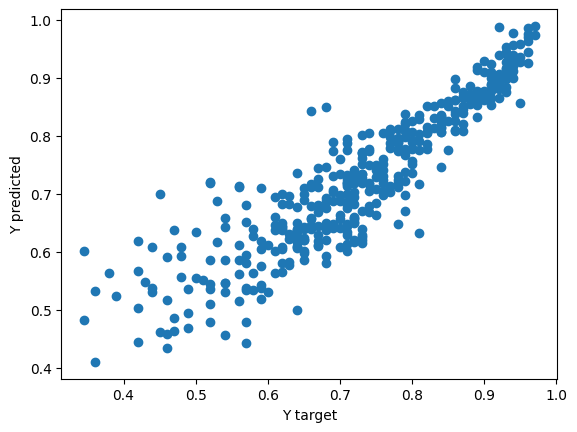

In [ ]:
plt.scatter(y_train,y_pred)
plt.xlabel('Y target')
plt.ylabel('Y predicted')

residual plot and test for homoscedasticity

Text(0.5, 1.0, 'Predicted values vs Residuals')

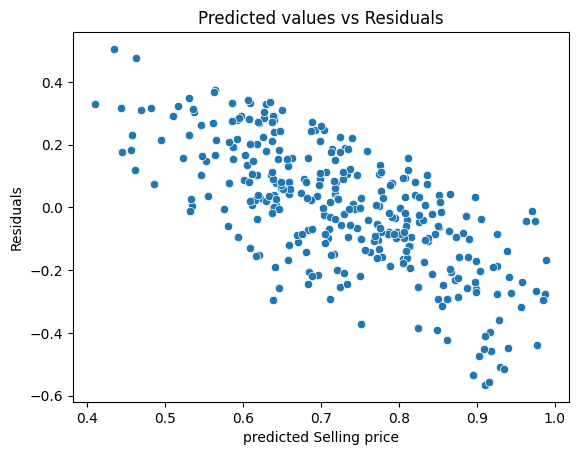

In [ ]:
sns.scatterplot(x=y_pred,y=residuals)
plt.xlabel("predicted Selling price")
plt.ylabel("Residuals")
plt.title("Predicted values vs Residuals")

Residual Histogram

Text(0.5, 1.0, 'Histogram of residuals')

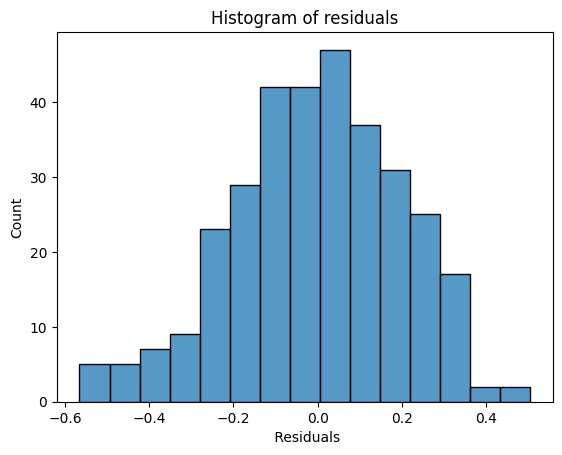

In [ ]:
sns.histplot(residuals)
plt.xlabel(" Residuals")
plt.title("Histogram of residuals")

Check of normality in residuals using QQ plot and Shapiro test

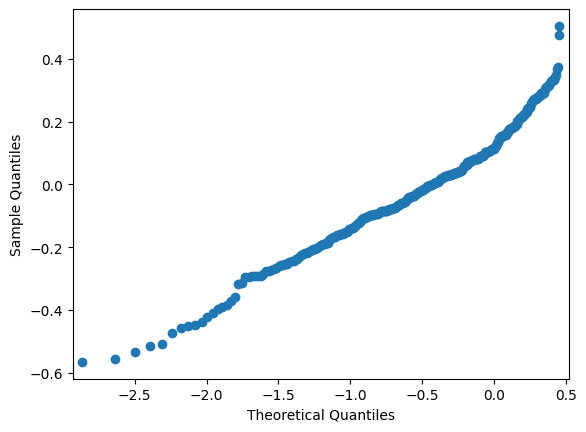

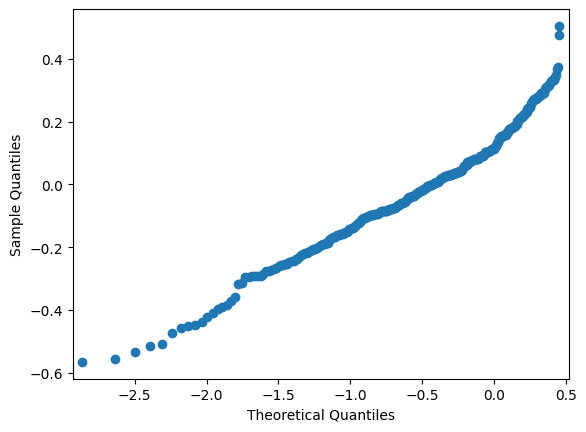

In [ ]:
from statsmodels.graphics.gofplots import qqplot

qqplot(residuals)

In [ ]:
from scipy.stats import shapiro

res = shapiro(residuals)
res.pvalue

1.0

MAE calculation

In [ ]:
residuals_abs = residuals.abs()
mae = residuals_abs.sum()/len(residuals)
mae

0.1066602688319023

RMSE calculation

In [ ]:
results.mse_resid

0.003753363770621831

R2 calculation

In [ ]:
results.rsquared

0.8102927230616237

R2 Adjusted calculation

In [ ]:
results.rsquared_adj

0.8078852703085986

## Liner Regression Using Sklearn

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [ ]:
model.coef_

array([0.1000575 , 0.0796764 , 0.01932851, 0.00882994, 0.06496447,
       0.35376175, 0.02470745])

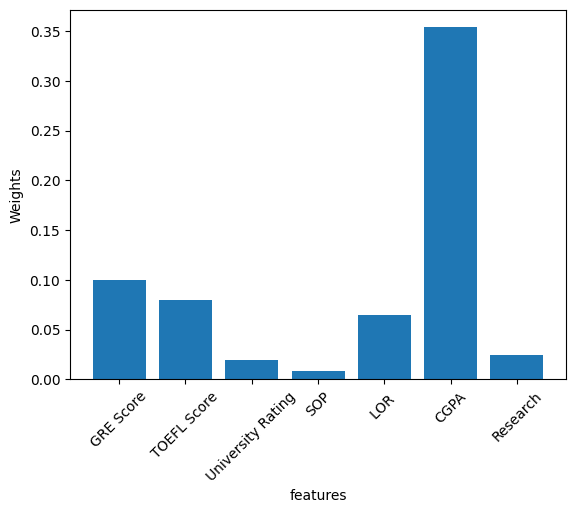

In [ ]:
x_bar = X.columns
y_bar = model.coef_

plt.bar(x_bar,y_bar)
plt.xticks(rotation=45)
plt.ylabel('Weights')
plt.xlabel('features')
plt.show()

In [ ]:
model.intercept_

0.36357402797501814

Text(0, 0.5, 'Y predicted')

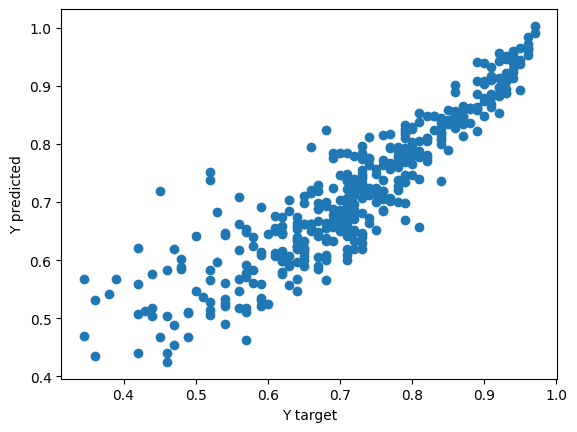

In [ ]:
y_pred = model.predict(X_train)

plt.scatter(y_train,y_pred)
plt.xlabel('Y target')
plt.ylabel('Y predicted')

In [ ]:
model.score(X_train,y_train)

0.829570591269029

In [ ]:
model.score(X_test,y_test)

0.7799072813750646

Text(0.5, 1.0, 'Histogram of residuals')

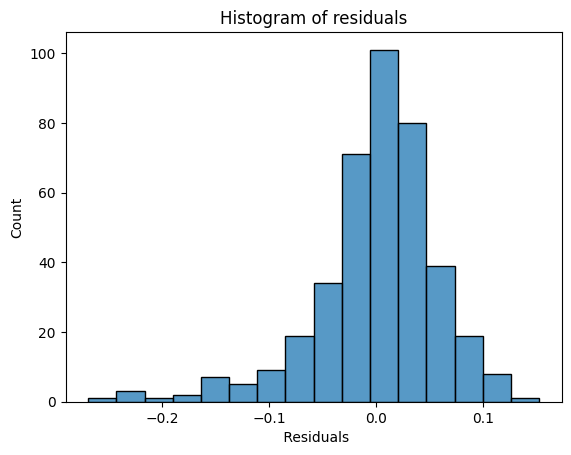

In [ ]:
residuals = y_train - y_pred
sns.histplot(residuals, bins=16)
plt.xlabel(" Residuals")
plt.title("Histogram of residuals")